In [124]:
import pandas as pd
import numpy as np
import statsmodels
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [117]:
def plot_ccf(x, y, ax=None, lags=None, alpha=.05, use_vlines=True, unbiased=False,
             fft=False, title='Cross-correlation', zero=True, **kwargs):
    fig, ax = utils.create_mpl_ax(ax)
    lags, nlags, irregular = statsmodels.graphics.tsaplots._prepare_data_corr_plot(x, lags, zero)
    confint = None
    ccf_val = ccf(x, y)
    if lags is not None:
        ccf_val = ccf_val[:nlags+1]
    statsmodels.graphics.tsaplots._plot_corr(ax, title, ccf_val, confint, lags, irregular, use_vlines, vlines_kwargs=kwargs)
    return fig

### Loading Dataset

In [162]:
covid = pd.read_csv("https://raw.githubusercontent.com/sujeongcha/TimeSeries-Transporation-and-Covid19/main/Data/Covid19_Data/data-by-day.csv")
covid['date'] = pd.to_datetime(covid['date_of_interest'])
covid = covid.set_index('date')
covid = covid.drop(columns=covid.columns[2:]).drop(columns=['date_of_interest'])
covid.columns = ['count']
covid = covid['2020-03-01':]
scaler = StandardScaler()
scaler.fit(covid)
covid['scaled_count'] = scaler.transform(covid['count'].values.reshape(-1,1))
covid[covid['count'] == 6353]

,count,scaled_count
date,,
2020-04-06,6353,3.788958


In [60]:
oldtaxi = pd.read_csv("https://raw.githubusercontent.com/sujeongcha/TimeSeries-Transporation-and-Covid19/main/Data/Taxi_Data/old_taxi.csv")
oldtaxi['date'] = pd.to_datetime(oldtaxi['pickup_datetime'])
oldtaxi = oldtaxi.set_index('date')
oldtaxi = oldtaxi.drop(columns=['pickup_datetime', 'trip_distance'])
oldtaxi.columns = ['count']
oldtaxi = oldtaxi['2020-03-01':]
scaler = StandardScaler()
scaler.fit(oldtaxi)
oldtaxi['scaled_count'] = scaler.transform(oldtaxi['count'].values.reshape(-1,1))
oldtaxi.head()

,count,scaled_count
date,,
2020-03-01,290126,2.694005
2020-03-02,293203,2.728456
2020-03-03,335556,3.202656
2020-03-04,343700,3.293839
2020-03-05,369014,3.577263


In [63]:
newtaxi = pd.read_csv("https://raw.githubusercontent.com/sujeongcha/TimeSeries-Transporation-and-Covid19/main/Data/Taxi_Data/new_taxi.csv")
newtaxi['date'] = pd.to_datetime(newtaxi['pickup_datetime'])
newtaxi = newtaxi.set_index('date')
newtaxi = newtaxi.drop(columns=['pickup_datetime', 'trip_distance'])
newtaxi.columns = ['count']
newtaxi = newtaxi['2020-03-01':]
scaler = StandardScaler()
scaler.fit(newtaxi)
newtaxi['scaled_count'] = scaler.transform(newtaxi['count'].values.reshape(-1,1))
newtaxi.head()

,count,scaled_count
date,,
2020-03-01,827807,2.933883
2020-03-02,712304,2.317922
2020-03-03,764664,2.597151
2020-03-04,775554,2.655225
2020-03-05,799329,2.782014


In [68]:
subway = pd.read_pickle("./daily_count.pkl")
subway = subway[['entries_diff']]
subway.columns = ['count']
subway = subway['2020-03-01':]
scaler = StandardScaler()
scaler.fit(subway)
subway['scaled_count'] = scaler.transform(subway['count'].values.reshape(-1,1))
subway.head()

,count,scaled_count
date,,
2020-03-01,2316878.0,1.264030
2020-03-02,5064783.0,4.342417
2020-03-03,5250286.0,4.550230
2020-03-04,5291673.0,4.596594
2020-03-05,5310236.0,4.617390


In [69]:
citibike = pd.read_csv("https://raw.githubusercontent.com/sujeongcha/TimeSeries-Transporation-and-Covid19/main/Data/CitiBike_Data/citibike_1520.csv")
citibike['date'] = pd.to_datetime(citibike['starttime_day'])
citibike = citibike.set_index('date')
citibike = citibike.drop(columns=['Unnamed: 0', 'starttime_day', 'tripduration', 'tripdistance'])
citibike.columns = ['count']
citibike = citibike['2020-03-01':]
scaler = StandardScaler()
scaler.fit(citibike)
citibike['scaled_count'] = scaler.transform(citibike['count'].values.reshape(-1,1))
citibike.head()

,count,scaled_count
date,,
2020-03-01,31878,-1.064699
2020-03-02,56946,-0.056165
2020-03-03,49723,-0.346760
2020-03-04,58670,0.013195
2020-03-05,58686,0.013838


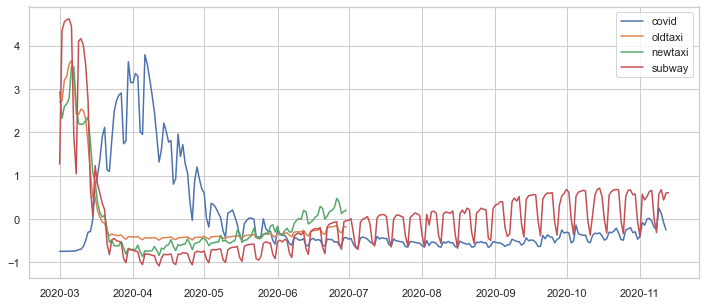

In [211]:
plt.figure(figsize=(12,5))
plt.plot(covid.scaled_count, label='covid')
plt.plot(oldtaxi.scaled_count, label='oldtaxi')
plt.plot(newtaxi.scaled_count, label='newtaxi')
plt.plot(subway.scaled_count, label='subway')
# plt.plot(citibike.scaled_count, label='citibike')
plt.legend()
plt.show()

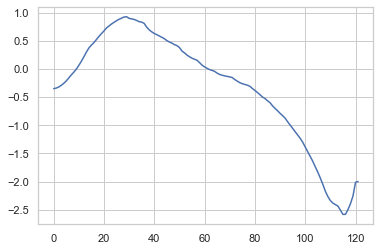

In [80]:
plt.plot(ccf(covid[:'2020-06-30'].scaled_count, oldtaxi.scaled_count))

In [97]:
covid_dec = seasonal_decompose(covid.scaled_count)
oldtaxi_dec = seasonal_decompose(oldtaxi.scaled_count)
newtaxi_dec = seasonal_decompose(newtaxi.scaled_count)
subway_dec = seasonal_decompose(subway.scaled_count)
citibike_dec = seasonal_decompose(citibike.scaled_count)

Covid Decomposition
Figure(432x288)


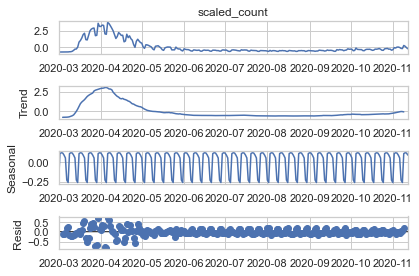

In [90]:
print("Covid Decomposition")
print(covid_dec.plot())

Old Taxi Decomposition
Figure(432x288)


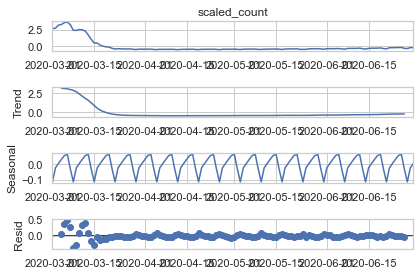

In [91]:
print("Old Taxi Decomposition")
print(oldtaxi_dec.plot())

New Taxi Decomposition
Figure(432x288)


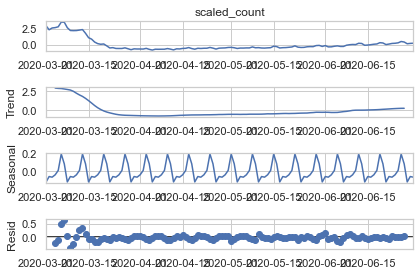

In [93]:
print("New Taxi Decomposition")
print(newtaxi_dec.plot())

Subway Decomposition
Figure(432x288)


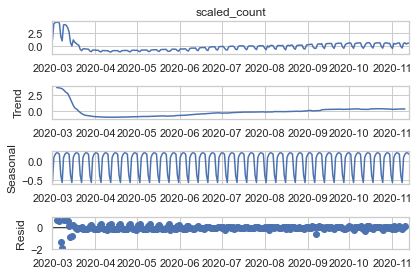

In [94]:
print("Subway Decomposition")
print(subway_dec.plot())

CitiBike Decomposition
Figure(432x288)


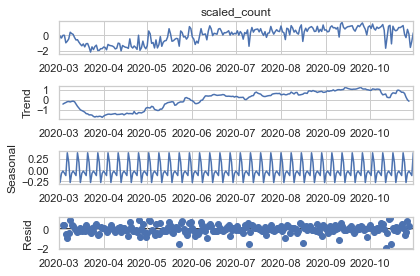

In [95]:
print("CitiBike Decomposition")
print(citibike_dec.plot())

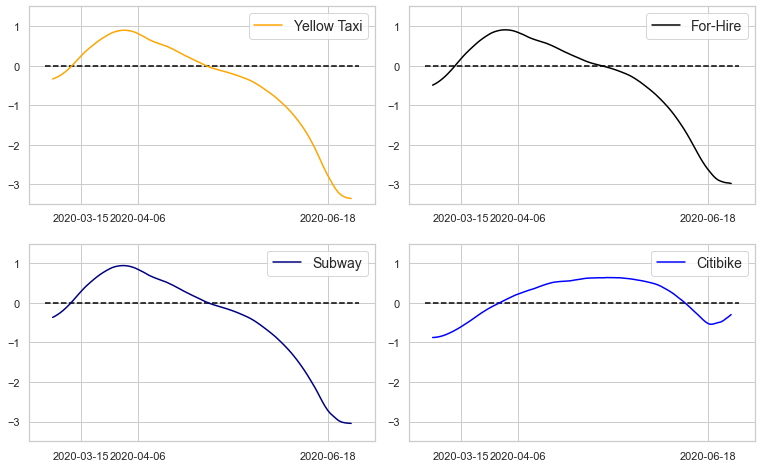

In [209]:
plt.figure(figsize=(13,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
plt.subplot(2,2,1)
plt.plot(covid['2020-03-04':'2020-06-27'].index, \
         ccf(covid_dec.trend['2020-03-04':'2020-06-27'], oldtaxi_dec.trend['2020-03-04':'2020-06-27']), \
         label='Yellow Taxi', c='orange')
plt.xticks(['2020-03-15', '2020-04-06', '2020-06-18'])
plt.hlines(y=0, xmin='2020-03-01', xmax='2020-06-30', color='black', linestyle='--')
plt.ylim(-3.5, 1.5)
plt.legend(fontsize=14)

plt.subplot(2,2,2)
plt.plot(covid['2020-03-04':'2020-06-27'].index, \
         ccf(covid_dec.trend['2020-03-04':'2020-06-27'], newtaxi_dec.trend['2020-03-04':'2020-06-27']), \
         label='For-Hire', c='black')
plt.xticks(['2020-03-15', '2020-04-06', '2020-06-18'])
plt.hlines(y=0, xmin='2020-03-01', xmax='2020-06-30', color='black', linestyle='--')
plt.ylim(-3.5, 1.5)
plt.legend(fontsize=14)

plt.subplot(2,2,3)
plt.plot(covid['2020-03-04':'2020-06-27'].index, \
         ccf(covid_dec.trend['2020-03-04':'2020-06-27'], subway_dec.trend['2020-03-04':'2020-06-27']), \
         label='Subway', c='navy')
plt.xticks(['2020-03-15', '2020-04-06', '2020-06-18'])
plt.hlines(y=0, xmin='2020-03-01', xmax='2020-06-30', color='black', linestyle='--')
plt.ylim(-3.5, 1.5)
plt.legend(fontsize=14)

plt.subplot(2,2,4)
plt.plot(covid['2020-03-04':'2020-06-27'].index, \
         ccf(covid_dec.trend['2020-03-04':'2020-06-27'], citibike_dec.trend['2020-03-04':'2020-06-27']), \
         label='Citibike', c='blue')
plt.xticks(['2020-03-15', '2020-04-06', '2020-06-18'])
plt.hlines(y=0, xmin='2020-03-01', xmax='2020-06-30', color='black', linestyle='--')
plt.ylim(-3.5, 1.5)
plt.legend(fontsize=14)

plt.savefig('ccf.png')
plt.show()

Figure(432x288)


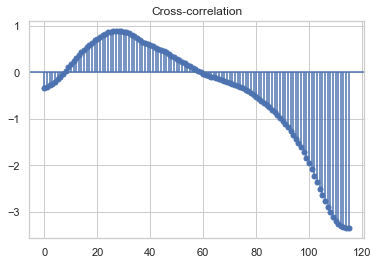

In [192]:
print(plot_ccf(covid_dec.trend['2020-03-04':'2020-06-27'], oldtaxi_dec.trend['2020-03-04':'2020-06-27'], lags=115))

Figure(432x288)


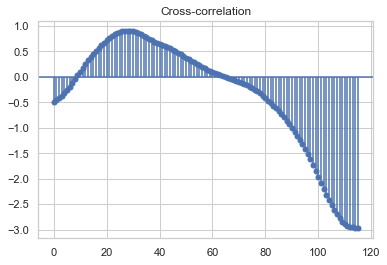

In [135]:
print(plot_ccf(covid_dec.trend['2020-03-04':'2020-06-27'], newtaxi_dec.trend['2020-03-04':'2020-06-27'], lags=115))

Figure(432x288)


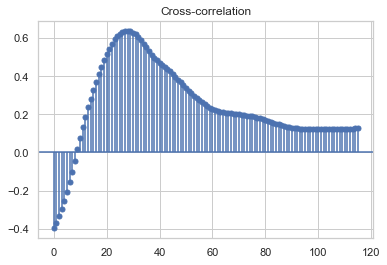

In [136]:
print(plot_ccf(covid_dec.trend['2020-03-04':'2020-11-09'], subway_dec.trend['2020-03-04':'2020-11-09'], lags=115))

Figure(432x288)


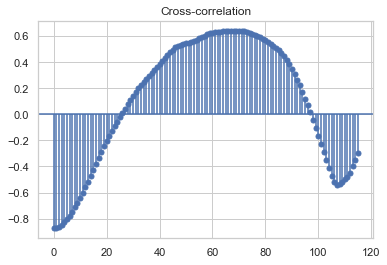

In [164]:
print(plot_ccf(covid_dec.trend['2020-03-04':'2020-06-27'], citibike_dec.trend['2020-03-04':'2020-06-27'], lags=115))

In [167]:
np.argmin(ccf(covid_dec.trend['2020-03-04':'2020-06-27'], citibike_dec.trend['2020-03-04':'2020-06-27'])[100:])

7

In [173]:
citibike_dec.trend['2020-03-04':'2020-06-27'][105:110]

date
2020-06-17    0.461758
2020-06-18    0.418508
2020-06-19    0.431342
2020-06-20    0.442860
2020-06-21    0.458924
Name: trend, dtype: float64